<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/syntheticdatageneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:
https://github.com/sdv-dev/SDV

https://docs.sdv.dev/sdv/single-table-data/data-preparation/single-table-metadata-api

# Synthetic Data Generation
Synthetic Data Generation refers to the process of generating artificial data that imitates real-world data. This data can be used for a variety of purposes, including training machine learning models, testing software systems, and protecting sensitive data.

The process of Synthetic Data Generation typically involves using algorithms to generate data that has similar statistical properties to real-world data. This can be done by analyzing patterns and correlations in the real data and then using this information to generate new data that follows the same patterns and correlations.

Synthetic Data Generation can be particularly useful in situations where real data is limited, expensive, or sensitive. For example, if you are developing a machine learning model that requires a large amount of data, you may not have access to enough real-world data to train the model effectively. In this case, you could use Synthetic Data Generation to generate additional data that can be used to train the model.

Overall, Synthetic Data Generation is a powerful tool for data scientists and software developers, providing a way to generate data that can be used to train models, test systems, and protect sensitive data, all while minimizing the need for real-world data.

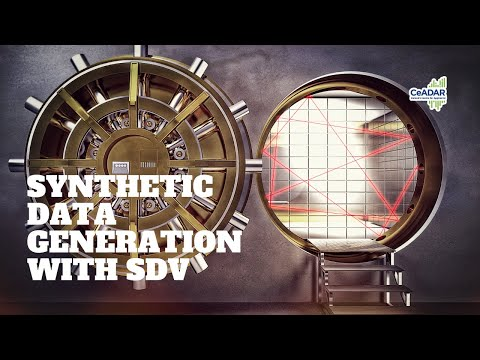

In [ ]:
#@title Synthetic Data Generation with SDV
#@markdown This video gives an intriduction to Synthetic Data Generation with SDV
from IPython.display import YouTubeVideo
YouTubeVideo('VD55NmNuhOw', width=600, height=400)

# Synthetic Data Generation for gas process digital twins
Training Machine Learning Models: Synthetic data can be used to train machine learning models that are used in gas process digital twins. Machine learning models can be trained using synthetic data that mimics the behavior of real-world gas processes. This synthetic data can be generated using algorithms that are based on physical models of gas processes or using statistical models that are trained on real-world data.

Testing and Validation: Synthetic data can also be used to test and validate gas process digital twins. By generating synthetic data that simulates different scenarios, you can test how the digital twin responds to different conditions. This can help identify any weaknesses or areas for improvement in the digital twin.

Privacy and Security: Another benefit of synthetic data is that it can be used to protect sensitive data. For example, if you need to share data with third-party vendors or partners, you can use synthetic data instead of real data to protect the privacy and security of the data.

# The Synthetic Data Vault (SDV) is a Python library
The Synthetic Data Vault (SDV) is a Python library designed to be your one-stop shop for creating tabular synthetic data. The SDV uses a variety of machine learning algorithms to learn patterns from your real data and emulate them in synthetic data.

In [ ]:
%%capture
!pip install sdv
!pip install wget

IMPORTANT! When this is finished, please restart the runtime by clicking on Runtime, and then Restart runtime in the top menu bar.

In [ ]:
import wget
url = 'https://raw.githubusercontent.com/EvenSol/NeqSim-Colab/master/notebooks/process/TimeSeries.csv'
filename = wget.download(url)

In [ ]:
from sdv.datasets.local import load_data_from_csv
try:
  datasets = load_data_from_csv('./TimeSeries.csv')
except:
  print('error loading data')

In [ ]:
import pandas as pd
datasets['time'] = pd.to_datetime(datasets['time'])
datasets.info()
datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               295 non-null    int64         
 1   time             295 non-null    datetime64[ns]
 2   AIT-1035.PV      295 non-null    float64       
 3   AIT-1034.PV      295 non-null    float64       
 4   TIC-0004.        295 non-null    float64       
 5   TIC-0014.        295 non-null    float64       
 6   SI-1303.         295 non-null    float64       
 7   SI-1203.         295 non-null    float64       
 8   TI-0040.         295 non-null    float64       
 9   TI-0020.         295 non-null    float64       
 10  PI-0005.         295 non-null    float64       
 11  FIT-1020.INUSE2  295 non-null    float64       
 12  TIT-0015.        295 non-null    float64       
 13  PI-0015.         295 non-null    float64       
 14  TI-0023.         295 non-null    float64  

,ID,time,AIT-1035.PV,AIT-1034.PV,TIC-0004.,TIC-0014.,SI-1303.,SI-1203.,TI-0040.,TI-0020.,...,TI-1014.,TI-1009.,PDI-1007.,PDI-1021.,TI-1015.,TI-1016.,TI-1026.,TI-1017.,TIT-1023.,PI-1002A.
0,1,2021-07-22 16:00:00,2.124527,1.854005,12.827853,20.787292,10089.484380,18.771513,20.714891,14.044848,...,82.050735,185.226090,-0.220314,-0.020376,82.926552,63.131474,44.244926,62.858376,49.776268,174.584564
1,2,2021-07-22 17:00:00,2.138708,1.815645,12.797386,20.864471,10116.480470,20.174797,20.747835,13.977755,...,81.484169,184.953751,-0.220082,-0.019820,82.612213,62.794952,43.634594,63.038731,49.874001,134.346664
2,3,2021-07-22 18:00:00,2.088995,1.833970,12.757312,20.866701,10131.242190,17.209808,20.747847,13.823836,...,81.114006,184.850113,-0.220491,-0.018862,82.315346,62.413651,43.486137,62.698929,49.580002,177.320709
3,4,2021-07-22 19:00:00,2.119753,2.281585,12.717237,20.824501,10103.740230,17.424650,20.747171,13.669919,...,80.833076,185.196365,-0.218881,-0.023792,82.125275,62.258865,43.405922,62.422691,49.677498,153.162353
4,5,2021-07-22 20:00:00,2.171875,1.949717,12.677161,20.810717,10104.041990,21.520544,20.746496,13.524674,...,80.675964,185.040649,-0.220013,-0.018676,81.916794,62.105812,43.325703,62.198273,49.532616,211.783798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,291,2021-03-08 18:00:00,2.781250,3.140625,24.950172,13.192172,20.065004,12443.231450,13.542486,25.113819,...,81.683273,181.504303,-0.220281,-0.011662,83.169044,64.991806,47.311195,63.938747,49.875839,202.358826
291,292,2021-03-08 19:00:00,2.832010,3.404726,24.996780,13.211868,19.987267,12441.532230,13.651270,25.115995,...,82.186905,181.266388,-0.220974,-0.009207,83.084671,64.909653,47.264156,63.946983,50.220795,202.396576
292,293,2021-03-08 20:00:00,2.763724,3.329662,25.004595,13.215734,19.909529,12439.833010,13.718925,25.118174,...,82.125740,181.072540,-0.222173,-0.014095,83.000290,64.840675,47.296040,63.894203,50.118355,202.035889
293,294,2021-03-08 21:00:00,2.854907,3.451344,25.072292,13.223864,19.831789,12438.134770,13.739315,25.120352,...,81.922569,180.939804,-0.222844,-0.013295,82.867630,64.751991,47.238319,63.815838,50.164433,202.293076


In [ ]:
datasets = datasets.drop(['time'], axis=1)

In [ ]:
from sdv.metadata import SingleTableMetadata


metadata = SingleTableMetadata()

metadata.detect_from_dataframe(data=datasets)

metadata.update_column(
    column_name='ID',
    sdtype='id'
)

metadata.set_sequence_key('ID')
'''
metadata.update_column(
    column_name='time',
    sdtype='datetime',
    datetime_format='%Y-%m-%d %H:%M:%S'
)

metadata.set_sequence_index('time')
'''

"\nmetadata.update_column(\n    column_name='time',\n    sdtype='datetime',\n    datetime_format='%Y-%m-%d %H:%M:%S'\n)\n\nmetadata.set_sequence_index('time')\n"

In [ ]:
print('Auto detected data:\n')
metadata

Auto detected data:



{
    "sequence_key": "ID",
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "ID": {
            "sdtype": "id"
        },
        "AIT-1035.PV": {
            "sdtype": "numerical"
        },
        "AIT-1034.PV": {
            "sdtype": "numerical"
        },
        "TIC-0004.": {
            "sdtype": "numerical"
        },
        "TIC-0014.": {
            "sdtype": "numerical"
        },
        "SI-1303.": {
            "sdtype": "numerical"
        },
        "SI-1203.": {
            "sdtype": "numerical"
        },
        "TI-0040.": {
            "sdtype": "numerical"
        },
        "TI-0020.": {
            "sdtype": "numerical"
        },
        "PI-0005.": {
            "sdtype": "numerical"
        },
        "FIT-1020.INUSE2": {
            "sdtype": "numerical"
        },
        "TIT-0015.": {
            "sdtype": "numerical"
        },
        "PI-0015.": {
            "sdtype": "numerical"
        },
        "TI-0023.": {
           

In [ ]:
datasets.keys()

Index(['ID', 'AIT-1035.PV', 'AIT-1034.PV', 'TIC-0004.', 'TIC-0014.',
       'SI-1303.', 'SI-1203.', 'TI-0040.', 'TI-0020.', 'PI-0005.',
       'FIT-1020.INUSE2', 'TIT-0015.', 'PI-0015.', 'TI-0023.', 'PIT-0009.',
       'FIT-1002.', 'TI-0013.', 'PIT-1013.', 'PIC-1004.', 'TI-1002.',
       'TIC-1003.', 'FIC-1000.', 'TIT-1027A.', 'PIT-1007B.', 'PDI-1016A.',
       'PDI-1016B.', 'PDI-1017.', 'PDI-1009.', 'PDI-1015.', 'TI-1011.',
       'TI-1010.', 'TI-1014.', 'TI-1009.', 'PDI-1007.', 'PDI-1021.',
       'TI-1015.', 'TI-1016.', 'TI-1026.', 'TI-1017.', 'TIT-1023.',
       'PI-1002A.'],
      dtype='object')

In [ ]:
metadata.validate()

In [ ]:
metadata.set_primary_key(column_name='ID')

#Model the data

# Generate new synthetic data

# Simlple method

In [ ]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(metadata, name='FAST_ML')
synthesizer.fit(datasets)
synthetic_data = synthesizer.sample(num_rows=200)

# Advanced method
https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/copulagansynthesizer

In [ ]:
from sdv.single_table import CopulaGANSynthesizer

# Step 1: Create the synthesizer
synthesizer = CopulaGANSynthesizer(metadata)

# Step 2: Train the synthesizer
synthesizer.fit(datasets)

# Step 3: Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=100)

https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/fast-ml-preset

# PAR method

In [ ]:
from sdv.sequential import PARSynthesizer

synthesizer = PARSynthesizer(metadata)
synthesizer.fit(datasets)
synthetic_data = synthesizer.sample(num_rows=10)

SynthesizerInputError: ignored

In [ ]:
datasets.head(10)

,ID,AIT-1035.PV,AIT-1034.PV,TIC-0004.,TIC-0014.,SI-1303.,SI-1203.,TI-0040.,TI-0020.,PI-0005.,...,TI-1014.,TI-1009.,PDI-1007.,PDI-1021.,TI-1015.,TI-1016.,TI-1026.,TI-1017.,TIT-1023.,PI-1002A.
0,1,2.124527,1.854005,12.827853,20.787292,10089.48438,18.771513,20.714891,14.044848,-0.080405,...,82.050735,185.226090,-0.220314,-0.020376,82.926552,63.131474,44.244926,62.858376,49.776268,174.584564
1,2,2.138708,1.815645,12.797386,20.864471,10116.48047,20.174797,20.747835,13.977755,-0.080536,...,81.484169,184.953751,-0.220082,-0.019820,82.612213,62.794952,43.634594,63.038731,49.874001,134.346664
2,3,2.088995,1.833970,12.757312,20.866701,10131.24219,17.209808,20.747847,13.823836,-0.080668,...,81.114006,184.850113,-0.220491,-0.018862,82.315346,62.413651,43.486137,62.698929,49.580002,177.320709
3,4,2.119753,2.281585,12.717237,20.824501,10103.74023,17.424650,20.747171,13.669919,-0.080800,...,80.833076,185.196365,-0.218881,-0.023792,82.125275,62.258865,43.405922,62.422691,49.677498,153.162353
4,5,2.171875,1.949717,12.677161,20.810717,10104.04199,21.520544,20.746496,13.524674,-0.080932,...,80.675964,185.040649,-0.220013,-0.018676,81.916794,62.105812,43.325703,62.198273,49.532616,211.783798
5,6,2.121238,2.346535,12.637087,20.819891,10105.98242,20.778519,20.745823,13.396845,-0.081063,...,80.581100,184.945877,-0.221092,-0.014161,81.708305,61.952858,43.245487,62.075611,49.188499,242.898727
6,7,2.125000,2.394156,12.597012,20.818991,10109.76660,19.697359,20.745148,13.269015,-0.081195,...,80.486237,184.877014,-0.221715,-0.018280,81.499817,62.072746,43.218647,61.952950,49.742596,156.947495
7,8,2.128266,2.148240,12.556937,20.857429,10111.89551,18.616199,20.722811,13.141186,-0.081335,...,80.391365,185.016922,-0.220515,-0.016775,81.291328,61.973003,43.221535,61.830288,49.291042,137.444916
8,9,2.133657,2.100676,12.580419,20.838295,10114.02734,17.216434,20.713976,13.021569,-0.081484,...,80.187958,185.066208,-0.222030,-0.021571,81.094231,61.833309,43.224659,61.670895,49.573933,137.095795
9,10,2.159952,1.963685,12.584793,20.828218,10111.92285,17.216434,20.742018,12.989205,-0.081632,...,79.959328,184.829727,-0.220571,-0.019223,80.957710,61.683620,43.228737,61.603428,49.286003,238.888153


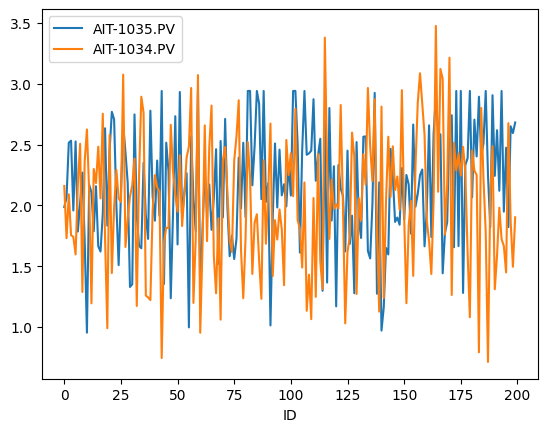

In [ ]:
import matplotlib.pyplot as plt

synthetic_data.plot(kind = 'line', x = 'ID', y = ['AIT-1035.PV', 'AIT-1034.PV'])

plt.show()

# View generated data set

In [ ]:
synthetic_data

,ID,AIT-1035.PV,AIT-1034.PV,TIC-0004.,TIC-0014.,SI-1303.,SI-1203.,TI-0040.,TI-0020.,PI-0005.,...,TI-1014.,TI-1009.,PDI-1007.,PDI-1021.,TI-1015.,TI-1016.,TI-1026.,TI-1017.,TIT-1023.,PI-1002A.
0,0,1.987001,2.159119,25.731778,9.861230,16.601562,12450.026370,11.850108,25.302607,70.449471,...,79.142283,184.436901,-0.227126,0.007357,78.033308,62.251398,45.580860,61.049101,49.273098,225.874281
1,1,2.063843,1.730499,21.194703,16.327334,4743.003776,7493.322638,17.129758,22.114191,43.344458,...,82.426808,184.697627,-0.218130,-0.023792,83.833699,65.069748,46.841319,63.512017,48.041864,194.758894
2,2,2.515711,2.091394,27.583081,11.572441,16.601562,12450.026370,11.751603,27.151982,70.449471,...,79.825001,183.478254,-0.226017,0.067836,79.695123,63.179539,46.216385,61.562786,49.683231,218.011325
3,3,2.532101,1.755729,25.147133,14.371381,2341.853852,10347.769268,12.486414,24.187032,51.043275,...,80.996803,184.739523,-0.221190,-0.023792,82.754860,64.556502,46.143115,63.710556,50.419744,178.347882
4,4,1.958044,1.740051,25.434985,10.802776,647.202534,12062.154591,6.695229,25.627771,68.099192,...,83.272284,183.413164,-0.222385,-0.023792,83.905922,65.166477,46.374809,63.636897,49.064471,167.698193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,2.474690,1.448504,21.520793,16.176557,5094.629294,6973.632264,14.516903,20.784235,43.319298,...,79.858393,183.733454,-0.225427,-0.022361,79.661607,61.630874,43.993776,61.451115,52.330266,189.993323
196,196,1.821180,2.676030,24.603911,12.894635,16.601562,12450.026370,11.666264,24.428815,68.076979,...,82.153982,182.740137,-0.223176,-0.023792,83.466848,65.313633,47.693081,63.946983,52.091359,215.495115
197,197,2.650655,1.870469,26.517894,10.733789,16.601562,12241.311367,4.680531,26.025493,70.449471,...,80.102352,183.146936,-0.226328,-0.002533,80.797073,64.411935,47.165650,62.271120,50.490501,176.097556
198,198,2.594616,1.495475,20.891220,17.767624,5916.981041,6393.047244,17.280381,22.123257,41.729114,...,81.894441,183.624960,-0.219796,-0.023792,83.269542,64.495585,46.204987,63.084384,49.350908,190.432459


# Check quality

This object computes an overall quality score on a scale of 0 to 100% (100 being the best) as well as detailed breakdowns. For more insights, you can also visualize the synthetic vs. real data.

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    datasets,
    synthetic_data,
    metadata)

Creating report: 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]


Overall Quality Score: 87.4%

Properties:
Column Shapes: 77.76%
Column Pair Trends: 97.04%


In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=datasets,
    synthetic_data=synthetic_data,
    column_name='AIT-1035.PV',
    metadata=metadata
)
    
fig.show()

# Simulate senarios

https://docs.sdv.dev/sdv/single-table-data/sampling#simulate-scenarios

In the below exmaple we sample with a condition that it is 2ppm from water analyser.

In [ ]:
from sdv.sampling import Condition

highWaterContent = Condition(
    num_rows=250,
    column_values={'AIT-1035.PV': 2.0}
)

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



In [ ]:
synthetic_data_restricted = synthesizer.sample_from_conditions(
    conditions=[highWaterContent]
    #,
    #output_file_path='synthetic_simulated_scenario5.csv'
)
synthetic_data_restricted

Sampling conditions: 100%|██████████| 250/250 [00:00<00:00, 458.61it/s]


,ID,AIT-1035.PV,AIT-1034.PV,TIC-0004.,TIC-0014.,SI-1303.,SI-1203.,TI-0040.,TI-0020.,PI-0005.,...,TI-1014.,TI-1009.,PDI-1007.,PDI-1021.,TI-1015.,TI-1016.,TI-1026.,TI-1017.,TIT-1023.,PI-1002A.
0,200,2.0,2.187974,7.546307,24.565794,8995.468627,16.601562,20.895203,9.107228,-0.083594,...,76.271913,185.922602,-0.230877,0.057780,73.388877,57.864379,40.610309,57.545360,50.150486,188.565498
1,201,2.0,1.934477,21.246187,18.536855,2215.929877,8869.144617,19.224548,20.195195,46.294894,...,76.642837,184.579326,-0.224361,0.058091,79.848848,63.198060,45.764801,60.994483,46.744680,207.504204
2,202,2.0,1.535969,20.539173,17.174203,826.860646,8530.869614,18.713713,20.286575,44.839979,...,77.866064,183.549659,-0.223061,0.026032,81.100834,62.455346,43.487971,60.634312,49.785313,173.448063
3,203,2.0,1.805860,21.506843,10.807307,16.601562,10511.749029,14.224160,23.912634,70.383884,...,81.820449,184.557018,-0.224895,-0.023792,80.596100,61.645525,42.454489,60.911336,49.282267,228.127218
4,204,2.0,2.107218,24.391336,12.959224,16.601562,12450.026370,14.061827,23.434196,70.449471,...,79.159783,184.008971,-0.230970,-0.020321,75.709958,61.573499,45.969541,59.989057,49.433910,209.221083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,445,2.0,2.307826,22.750245,15.268051,16.601562,12450.026370,17.945028,22.326137,70.449471,...,76.068247,183.874511,-0.227155,0.066278,76.820189,62.266860,46.948544,60.405865,52.514581,210.670560
246,446,2.0,1.541039,19.473710,15.729769,3029.121356,7625.696092,20.480203,18.891258,37.328985,...,80.543227,185.176548,-0.218859,-0.023792,82.325948,62.546398,43.337988,62.254488,47.875785,183.999190
247,447,2.0,1.966262,26.007486,14.216754,16.601562,12450.026370,13.068321,24.666589,70.449471,...,78.608589,183.611662,-0.225876,0.041947,77.156208,61.688282,45.624225,60.081372,48.864349,211.076189
248,448,2.0,3.207384,26.948709,12.477310,16.601562,12450.026370,14.822347,26.468992,70.449471,...,77.976359,183.108809,-0.228524,0.048833,77.807238,61.539545,44.867293,61.105114,51.066077,209.644800
